In [ ]:

# Slow method

In [17]:
import random
import numpy as np
import networkx as nx

In [18]:
def generate_transtions_v0 (num_nodes , num_attractors):
    n = num_nodes
    s = 2**n # number of states
    r = num_attractors

    num_att = 0
    while num_att != r:
        edgelist = [(i,random.randint(0, s-1)) for i in range(s)]
        G = nx.from_edgelist(edgelist)
        num_att = nx.number_connected_components(G)
    
    sizes = [len(B) for B in sorted(nx.connected_components(G), key=len, reverse=True)]

    return sizes, edgelist

In [20]:
basin_sizes, transitions = generate_transtions_v0 (num_nodes = 10 , num_attractors = 5)
basin_sizes

[819, 169, 22, 13, 1]

In [ ]:

# Faster method

In [21]:
import random
import networkx as nx

In [22]:
def transitions_between_layers(inner_layer,outher_layer):
    """
    Generate transitions from the outher to the inner layer.
    The inputs are lists of states in the two layers
    """
    edges = []
    for i in outher_layer:
        random.shuffle(inner_layer)
        j = inner_layer[0]
        edges.append((i,j))
    return edges

In [23]:
def core_transitions(length):
    """
    Given the length of the cycle,
    generate its associated transitions.
    These states take labels 0, 1, ..., length 
    """
    return [(i, (i+1)%length) for i in range(length)]

In [24]:
def layer_distribution(length, num_states):
    """
    Generate the distribution of the number of states,
    [n1,n2,n3,...]
    where n1 is the number of states in the innermost layer (i.e. the cycle),
    n2 is the number of states in layer 2, etc.
    """
    layer_widths = [length]
    while sum(layer_widths) < num_states:
        assigned_states = sum(layer_widths)
        m = random.randint(1,num_states-assigned_states)
        layer_widths.append(m)
    return layer_widths

In [25]:
# generate the distribution of states

def transitions(length, num_states):
    """
    Generate the list of transitions for a single connected component.
    The states are labeled 0, ..., num_states.
    """
    
    dist = layer_distribution(length, num_states)
    edges = core_transitions(length)

    for i in range(len(dist)-1):
    
        # outher_layer
        layer_id = i+1
        start = sum(dist[:layer_id])
        stop  = sum(dist[:layer_id]) + dist[layer_id]
        outher_layer = list(range(start, stop))
    
        # inner_layer
        layer_id = i
        start = sum(dist[:layer_id])
        stop  = sum(dist[:layer_id]) + dist[layer_id]
        inner_layer = list(range(start, stop))
    
        edges = edges + transitions_between_layers(inner_layer,outher_layer)
    
    return edges

In [30]:
edges = transitions(length = 3, num_states = 100)
edges[:10]

[(0, 1),
 (1, 2),
 (2, 0),
 (3, 0),
 (4, 1),
 (5, 1),
 (6, 1),
 (7, 0),
 (8, 2),
 (9, 2)]

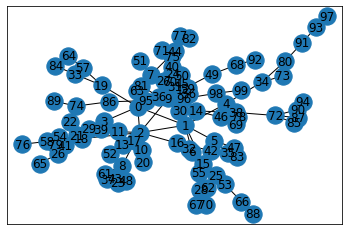

In [31]:
G = nx.from_edgelist(edges)
pos = nx.spring_layout(G)
nx.draw_networkx(G, pos)

In [32]:
G = nx.from_edgelist(edges)
num_att = nx.number_connected_components(G)
num_att

1

In [16]:
# To do:
# Now I need to separate the larger transition graph into connected components generated this way

# I can either generate all transitions, or just select certain inputs, 
# evolve those, then randomly assign the global state labels

In [45]:
n = 3
labels = list(range(2**n))

In [46]:
labels

[0, 1, 2, 3, 4, 5, 6, 7]

In [ ]:
num_nodes = 10
num_states = 2**num_nodes

landscape = [[3,1],[1,2],[1,5]]
# this describes a transition graph with 3 attractors: a cycle with length 3, and two fixed points.
# the second element in each entry is the relative size of the basin. 
# In this case the basin sizes are in ratios 1:2:5

sum(np.array(landscape)[:,1])

In [ ]:
basin_sizes = 